# Introduction -

The aim of this assignment is to use different approaches to train the models and classify the data of customers of a Taiwanese Bank.

The approaches we will be using are as follows-

1. Pocket Algorithm
2. Quadratic Discriminant Analysis(QDA) 
3. Linear Discriminant Analysis(LDA)
4. Logistic Regression 



# Data -

# Introduction to the data-

The dataset is a collection of data from a bank in Taiwan. It is aimed at the case of default payments of the customers.It takes into consideration the attributes which include education,age,gender,etc.The attributes help us to determine whether the person will default his/her payment.

Attribute Information :

    LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family     (supplementary) credit.
    SEX: Gender (1 = male; 2 = female).
    Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
    MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
    Age: (year).
    PAY_0 - Pay_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    PAY_0 = the repayment status in September, 2005;
    PAY_02 = the repayment status in August, 2005; . . .;
    PAY_06 = the repayment status in April, 2005. 
    The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
    BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar).
    BILL_AMT1 = amount of bill statement in September, 2005;
    BILL_AMT2 = amount of bill statement in August, 2005; . . .; 
    BILL_AMT6 = amount of bill statement in April, 2005.
    PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 
    PAY_AMT1 = amount paid in September, 2005; 
    PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005

In [ ]:
#Reading the data-

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
def load_data(path='credit.xls'):
    xls_path="credit.xls"
    return pd.read_excel(xls_path)
bank=load_data()

# Visualization & Preprocessing of the Data :

In [16]:
#General overview of the data-

In [17]:
bank.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [19]:
bank["AGE"].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [20]:
bank.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [21]:
bank.isnull().any().sum()

0

In [22]:
#The data does not have missing values.

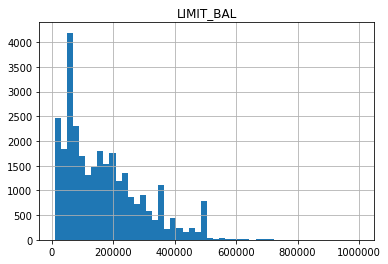

In [23]:
import matplotlib.pyplot as plt
bank.hist("LIMIT_BAL",bins=50)
plt.show()

The limit balance seems to have high frequency around 1500000.

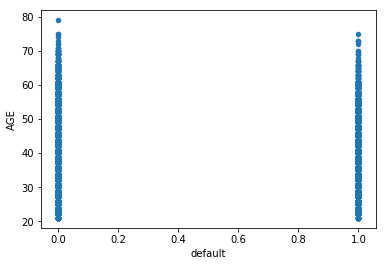

In [24]:
bank.plot(kind="scatter",x="default",y="AGE")

The above scatter plot gives us a relation between default and age of the candidates.

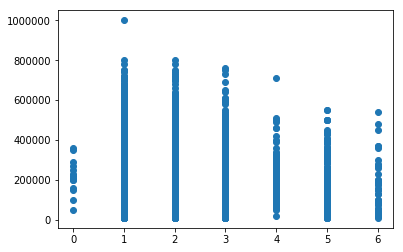

In [25]:
plt.plot(bank.EDUCATION,bank.LIMIT_BAL,'o')
plt.show()

The range of the data is expanded from 1-3 to 1-6 due to the data, from observation we come to understand that the graduate school education has highest limit balance.

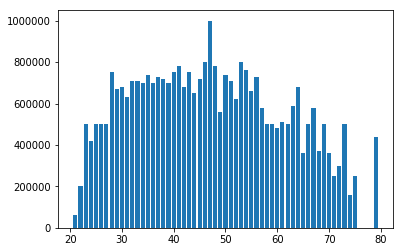

In [26]:
plt.bar(bank.AGE,bank.LIMIT_BAL)
plt.show()

The bar graph shows us that the highest balance is around 48.

In [27]:
bank1=bank[['PAY_0','EDUCATION','AGE','SEX']]
bank['default'].replace({0:-1},inplace = True)
bank2=bank[['default']]

# Method -

# Summary of the classification models-

# Pocket Algorithm -

The Pocket algorithm is similar to perceptron algorithm. It tackles the unstability of the perceptron algorithm. It saves the best solution so far in a pocket. As weights are updated in an iterative approach like the pocket algorithm,there is always a chance that a good weight was replaced during the iteration. If the data is not seperable in a linear fashion,it may not converge.
$$
 wv^{(k+1)} = wv^{(k)} + \alpha t_i xv_i
$$

We have a base class for the pocket algorithm which utilizes the train and use methods.It has a compare function to compare the weights and we save the best one in a pocket.


# QDA-

QDA makes use of a decision boundary which is calculated by using the posterior and prior probabilities.QDA assumes that the data follows a Gaussian distribution.The probability that one instance belongs to a class is calculated by considering the mean, covariance and prior probability for the target.
$$
y = \arg\max_k \delta_k(\tilde{xv}). 
$$
where,
$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$
as $$\delta_k()$$ is quadratic in x the decision boundary is quadratic. We call this approach Quadratic Discriminant Analysis.

# LDA-

LDA is similar to QDA but here we assume every class has the same  covariance matrix.It also assumes that each attribute has the same variance.Similar to QDA it assumes a Gaussian Distribution of data.LDA calculates the probabilities of each set of inputs belonging to a new class and the class with the highest probabilitiy is the output.It is also used to counter the problem of overfitting.
$$
 \delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

 In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$
 


# Logistic Regression -

Logistic Regression is conducted when the dependent variable is categorical.Like other regressions,Logistic Regression is also a predictive analysis.Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal,independent variables.As logistic regression is unbound we make use of Logistic Regression whose value ranges from 0 to 1.
 $$
 wv_j \leftarrow wv_j + \alpha Xm^\top \Big(  t_{*,j} - g_j(Xm)\Big).
 $$

# Superclass Definition -

In [28]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

# Explanation of code-

The basemodel class has two methods train() and use().Whichever class extends this basemodel class must provide implementation for these classes.Classifier contains init,normalize,check_matrix,add_ones.Check matrix is used to check if the argument is a 2D matrix,if it is not a 2D matrix then a valueError is raised.We use add.ones to convert it to a 2D matrix.

# 2. Pocket Algorithm-

In [29]:
from copy import deepcopy as copy 
import pandas as pd
class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=10
        self.alpha=0.01
        self.w=None
        self.w_pocket=None
        
    @staticmethod   
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        N=20
        self.w = np.zeros(X.shape[1])
        self.w_pocket=copy(self.w)
        print(self.w_pocket)
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_pocket)
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)

# Explanation-

The superclass is a parent class of the Pocket class.It implements two methods train and use.The train method is used to train our model for pocket algorithm.The use function predicts the value using the test data.The compare function is used to compare weights.Initial weight is zero and as the program performs iterations we update the weight stored in the pocket if it is better than the previous one.

# QDA-

In [30]:
from copy import deepcopy as copy
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
       
        
        
    @staticmethod    
    def QDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(p)
    
    
    def train(self,X_train,t):
        
        X1=bank[bank.default == -1.0]
        X1=X1.drop(['default'],axis=1)
        X2=bank[bank.default == 1.0]
        X2=X2.drop(['default'],axis=1)
        
        
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        X=X.drop(['default'],axis=1)
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDAfunc(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDAfunc(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

# Explanation-

QDA will make use of superclass's abstract functions.QDAFunc calculates discriminante value for each class.Here X is the input data which contains all the columns and t contains the target column.Mu1,mu2 are the mean.Sigma1,Sigma2 stores covariance of the two classes X1 and X2.We are taking rows which have corresponding values in the target column as 1 and as -1.We are storing them in X2,X1.use function will evaluate d1 and d2 by calling QDAfunc and then checking the greater value and assigning the class -1 and 1 accordingly and returns prediction and d1,d2.N1 and N2 store status rows in it.

In [31]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(p), axis=1)
    
    
    def train(self,X_train,t):
        X1=X_train[bank.default == -1.0]
        X1=X1.drop(['default'],axis=1)
        X2=X_train[X_train.default == 1.0]
        X2=X2.drop(['default'],axis=1)
        X_train = X_train.drop(['default'],axis=1)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
              
        self.Sigma = np.cov(X_train.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    
    def use(self,X):
        X=X.drop(['default'],axis=1)
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDAfunc(X,self.mu1,self.Sigma,self.p1),self.LDAfunc(X,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],1,-1)
        return pred,self.d1,self.d2

# Explanation-

LDA is a child of the parent class superclass.It is similar to QDA.Here LDAFunc is used to calculate the discriminant value.Similar to QDA X takes input values and t takes the target values.Mu1,mu2 are the mean.N1 and N2 store status rows in it.
use function will evaluate d1 and d2 by calling LDAfunc and then checking the greater value and assigning the class -1 and 1 accordingly and returns prediction and d1,d2.

# Logistic Regression-

In [32]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

# Explanation-

The train function takes input matrices X and T.It calculates K and D,K is the number of unique classes in T and D is the number of features.use function takes test data X as input.It adds one column to it after normalization.It calculates output using a sigmoid function on the dot product of Xs and weights max.

# Experiments-

# Pocket Algorithm-

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

scaler = StandardScaler()


t=bank2
X_train,X_test,y_train,y_test = model_selection.train_test_split(bank1,t,test_size=0.30,random_state=40)

In [89]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [90]:
p=Pocket()
p.train(X_train,y_train)

# Prediction on train set
ypred_train=p.use(X_train)

# Prediction on test set
ypred_p=p.use(X_test)


[0. 0. 0. 0.]
End of training:  9
[ 0.02571777 -0.02423922 -0.00236706  0.00107481]


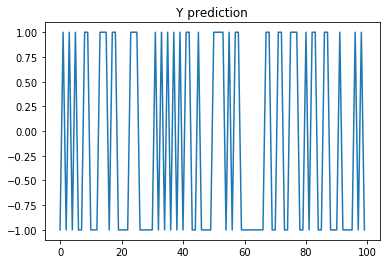

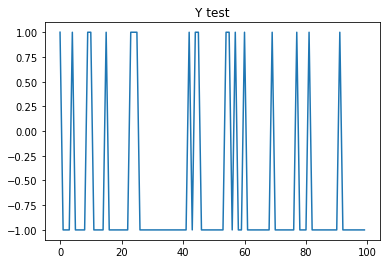

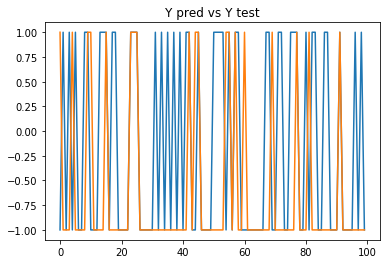

In [91]:
plt.title("Y prediction")
plt.plot(ypred_p[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_p[0:100])
plt.plot(y_test[0:100])
plt.show()

# Accuracy and F1-

In [92]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_train,ypred_train))
print('F1 score:', f1_score(y_train,ypred_train))

Accuracy: 0.605904761904762
F1 score: 0.4047756041426927


# Confusion Matrix-

In [93]:
cf=confusion_matrix(y_test, ypred_p)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

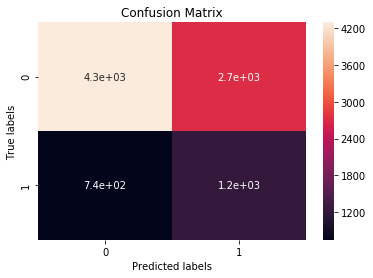

In [94]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

# Evaluation Metrics-

In [95]:
precision=(TP/(TP+FP))
precision

0.31243680485338726

In [96]:
specificity=TN/(TN+FP)
specificity

0.6124804103148597

In [97]:
recall=TP/(TP+FN)
recall

0.6239273094396769

# On test data-

In [98]:
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

Accuracy: 0.615
F1 score: 0.4163719050025265


# ROC AUC Score-

In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_p)

0.6182038598772683

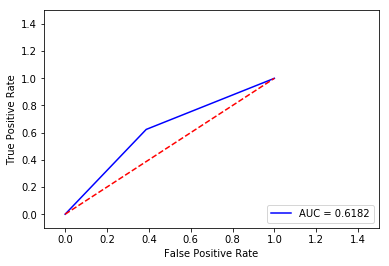

In [100]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_p)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# QDA-

In [35]:
# Dividing data into train set and test set
from sklearn import model_selection
from sklearn.metrics import r2_score
t=bank2
bank_new=bank.drop(['default'],axis=1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(bank,t,test_size=0.20,random_state=0)

In [37]:
# Training
q=QDA1()
q.train(X_train,y_train)

# Accuracy F1-

In [38]:
ypred_qda_train,d1,d2=q.use(X_train)

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_train,ypred_qda_train))
print('F1 score:', f1_score(y_train,ypred_qda_train))

Accuracy: 0.23216666666666666
F1 score: 0.3652958600261762


# Test Data prediction -

In [40]:
ypred_qda_test,d1,d2=q.use(X_test)
print('Accuracy:', accuracy_score(y_test,ypred_qda_test))

Accuracy: 0.22283333333333333


# Confusion Matrix-

In [41]:
cf1=confusion_matrix(y_test, ypred_qda_test)
cf1

array([[  50, 4653],
       [  10, 1287]], dtype=int64)

In [42]:
TP=cf1[1][1]
TN=cf1[0][0]
FN=cf1[1][0]
FP=cf1[0][1]

# Evaluation Metrics-

In [43]:
precision=(TP/(TP+FP))
precision

0.21666666666666667

In [44]:
specificity=TN/(TN+FP)
specificity

0.0106315118009781

In [45]:
recall=TP/(TP+FN)
recall

0.992289899768697

In [46]:
print('Accuracy:', accuracy_score(np.array(y_test), ypred_qda_test))
print('F1 score:', f1_score(np.array(y_test), ypred_qda_test))

Accuracy: 0.22283333333333333
F1 score: 0.35567223987840263


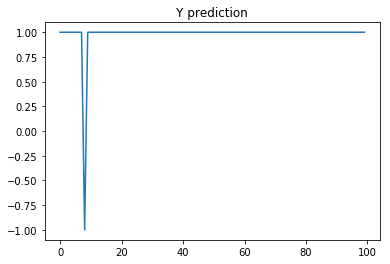

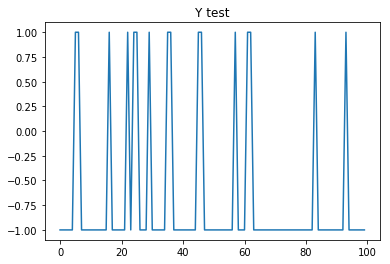

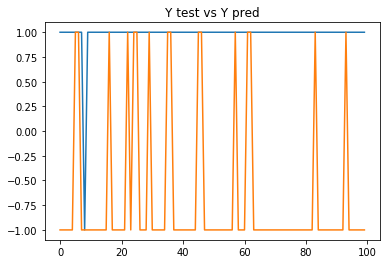

In [47]:
plt.title("Y prediction")
plt.plot(ypred_qda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_qda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

# Roc AUC Score-

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_qda_test)

0.5014607057848375

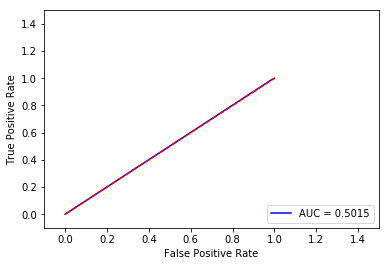

In [50]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_qda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

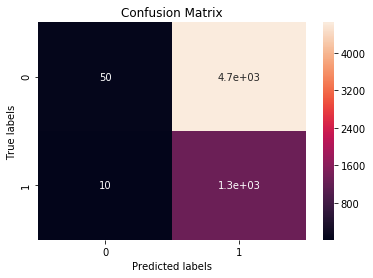

In [51]:
ax= plt.subplot()
sns.heatmap(cf1, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

Text(0.5,0.92,'QDA Discriminant Functions')

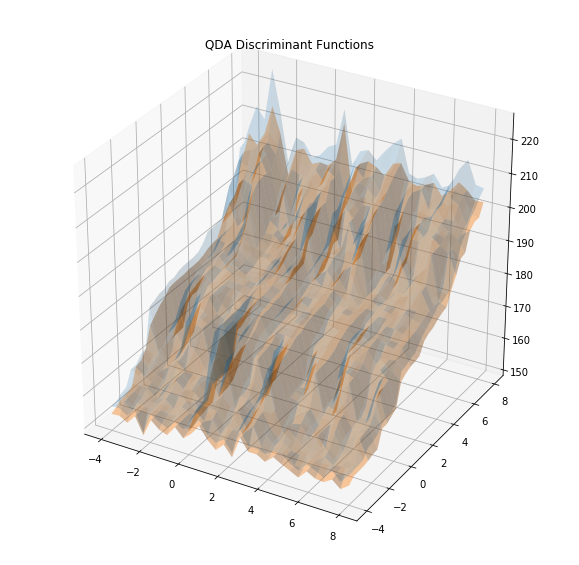

In [52]:
from mpl_toolkits.mplot3d import Axes3D
p,d1_p,d2_p = q.use(X_test[:900])    #predicted


xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Text(0.5,0.92,'QDA Discriminant Functions')

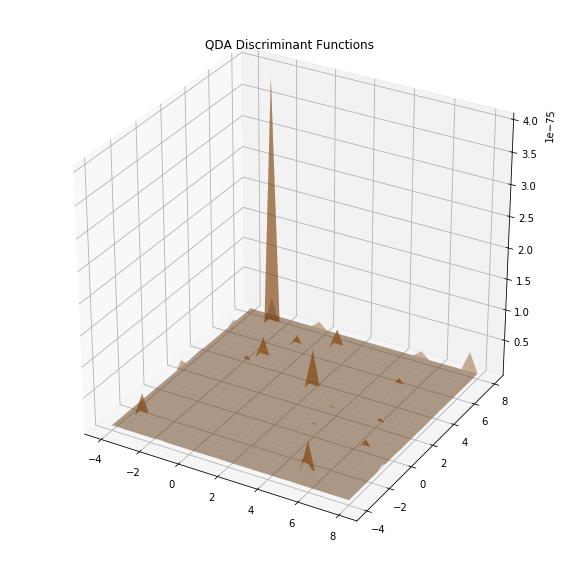

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.title("QDA Discriminant Functions")

Text(0.5,1,'Decision Boundary')

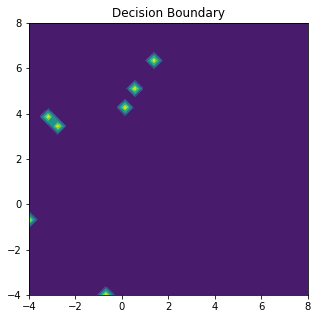

In [54]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# LDA-

In [55]:
t=bank2
X_train,X_test,y_train,y_test = model_selection.train_test_split(bank,t,test_size=0.20,random_state=40)

In [87]:
l=LDA1()
l.train(X_train,y_train)

In [57]:
ypred_lda_train,d1,d2=l.use(X_train)

# Accuracy -

In [58]:
print('Accuracy:', accuracy_score(y_train,ypred_lda_train))
print('F1 score:', f1_score(y_train,ypred_lda_train))

Accuracy: 0.221625
F1 score: 0.362836385961322


In [59]:
ypred_lda_test,d1,d2=l.use(X_test)

# Confusion Matrix-

In [60]:
from sklearn.metrics import confusion_matrix
cf2=confusion_matrix(y_test, ypred_lda_test)
cf2

array([[   0, 4683],
       [   0, 1317]], dtype=int64)

In [61]:
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]

# Evaluation Metrics -

In [62]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)

Precision:  0.2195


In [63]:
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.2195
F1 score: 0.35998359983599837


# ROC AUC Score-

In [64]:
roc_auc_score(y_test, ypred_lda_test)

0.5

In [65]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

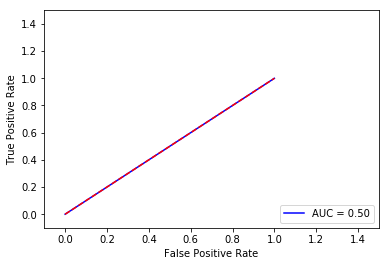

In [66]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

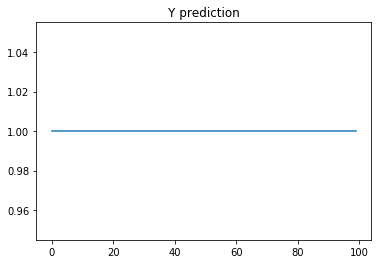

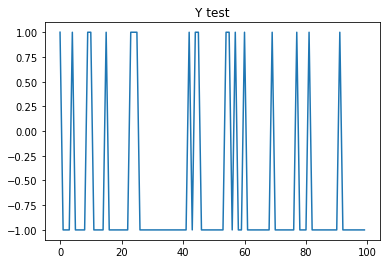

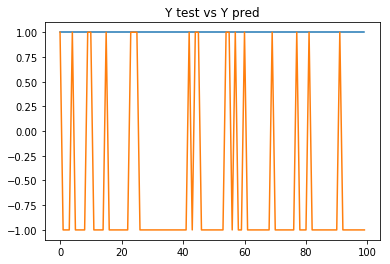

In [67]:
plt.title("Y prediction")
plt.plot(ypred_lda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_lda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

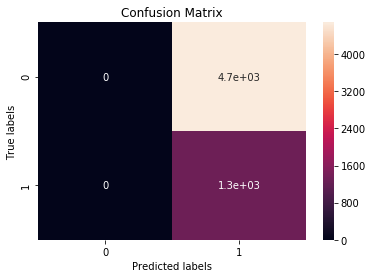

In [68]:
ax= plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [69]:
p,d1_p,d2_p = l.use(X_test[:900]) #predicted

Text(0.5,0.92,'LDA Discriminant Functions')

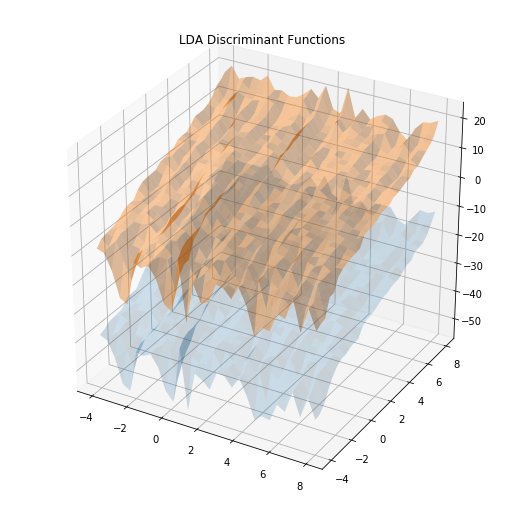

In [70]:
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5,0.92,'LDA Discriminant Functions')

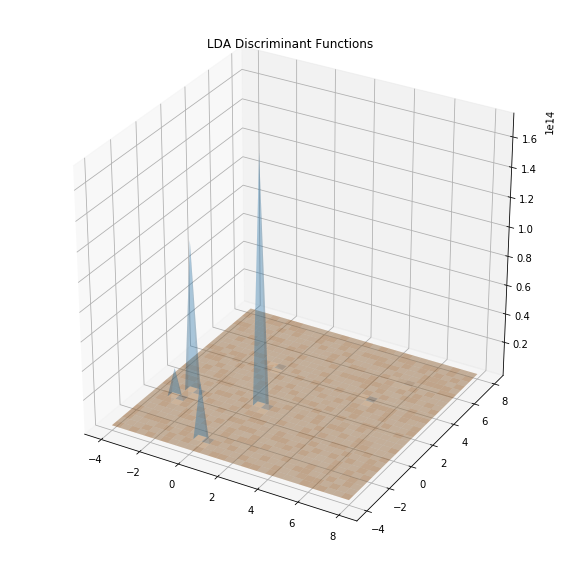

In [71]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5,1,'Decision Boundary')

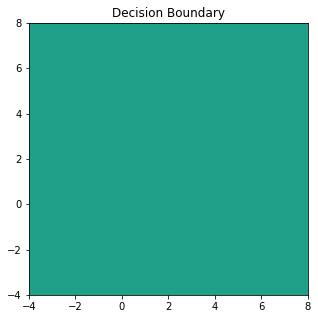

In [72]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# Logistic Regression-

In [73]:
lr = Logistic(0.0001)
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(bank_new, t,test_size=0.20,random_state=42)

In [74]:
lr.train(XTrain[:],np.array(YTrain[:]))
ypred_lr_train = lr.use(XTrain[:])
ypred_lr_train = np.argmax(ypred_lr_train, 1)
print(ypred_lr_train)
y_train=np.array(YTrain)
y_train=np.where(YTrain==-1,0,1)
print(y_train)

[0 0 0 ... 1 0 0]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [75]:
print('Accuracy:', accuracy_score(y_train, ypred_lr_train))
print('F1 score:', f1_score(y_train, ypred_lr_train))

Accuracy: 0.7239583333333334
F1 score: 0.1803785723122603


In [76]:
ypred_lr_test = lr.use(XTest[:])
ypred_lr_test

array([[0.76248149, 0.23751851],
       [0.97470899, 0.02529101],
       [0.94041752, 0.05958248],
       ...,
       [0.90863058, 0.09136942],
       [0.3266669 , 0.6733331 ],
       [0.99857598, 0.00142402]])

In [77]:
ypred_lr_test = np.argmax(ypred_lr_test, 1)
print(ypred_lr_test)
y_test=np.array(YTest)
y_test=np.where(YTest==-1,0,1)
print(y_test)

[0 0 0 ... 0 1 0]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Confusion Matrix-

In [78]:
cf3=confusion_matrix(y_test, ypred_lr_test)
cf3

array([[4190,  497],
       [1121,  192]], dtype=int64)

In [79]:
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

# Evaluation Metrics-

In [80]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.27866473149492016
Specificity:  0.8939620226157456
Recall:  0.14623000761614624


In [81]:
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.7303333333333333
F1 score: 0.1918081918081918


# ROC AUC Score-

In [82]:
roc_auc_score(y_test, ypred_lr_test)

0.5200960151159459

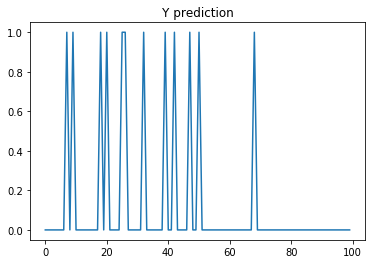

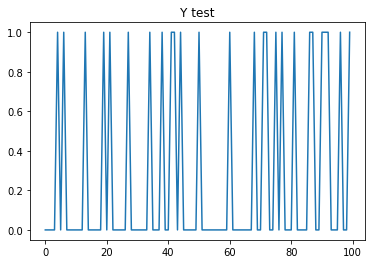

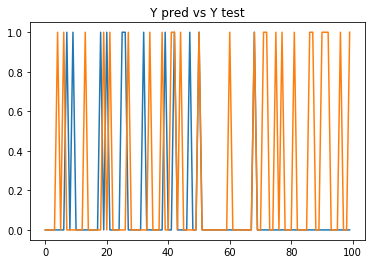

In [83]:
plt.title("Y prediction")
plt.plot(ypred_lr_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_lr_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

Text(0.5,1,'Confusion Matrix')

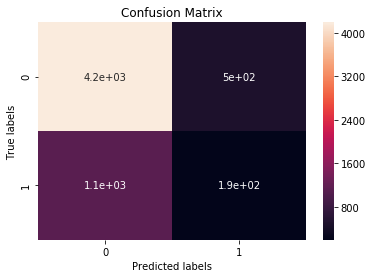

In [84]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

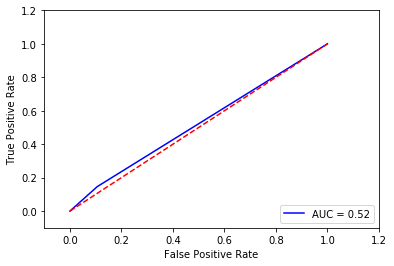

In [85]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lr_test)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Discussion about evaluation metrics-

Confusion matrix: A confusion matrix is a technique for summarizing the performance of a classification algorithm.
Here is an example confusion matrix. 


$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

#### Precision, Recall and Specificity 
<b> Precision <b>: The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct. 
    
    
    precision=TP/(TP+FP)


<b> Recall (Sensitivity or True Positive Rate)<b>: This measure give you how the model's prediction covers the positive class. 
    
    
    recall=TP/(TP+FN)



<b> Specificity (True Negative Rate) <b> : Considering imblance or difference in class, we consider TNR as well.
    
    
    specificity=TN/(TN+FP)

#### F1 Score
For convenience, many people want a single measure rather than multiple as above. For those, we can provide the harmonic mean of precision and recall.


#### ROC Curve
ROC Curve is used for binary clssifications.The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). As in the figure below, starting from the boundary (or threshold) with 0% of false positive rate, moving the boundary, it shows the true positive rate by including more false positive areas

# Discussion About Train and Test Accuracies-

### Pocket Algorithm- 
I got<br> Accuracy: 0.605904761904762 <br>
F1 score: 0.4047756041426927<br> for the training data
with<br> precision:0.31243680485338726<br>
specificity:0.6124804103148597<br>
recall:0.6239273094396769<br>
roc_auc_score:0.6182038598772683<br>

The Pocket Algorithm was able to achieve an accuracy of 60% while training whereas while testing it got 61.5% accuracy which is slightly greater. This implies that the algorithm was able to learn more with training and testing as steps. Precision calculates out of those predicted positives, how many of them are actual positives. 

### QDA-
I got <br>Accuracy: 0.23216666666666666
F1 score: 0.3652958600261762<br> with <br>
Precision :0.21666666666666667<br>
ROC :0.5014607057848375<br>
Which suggests that the model did not perform well on the given data as the accuracy did not improve significantly on the test data.

### LDA-
I got similar results for LDA <br>
Accuracy: 0.221625<br>
F1 score: 0.36283638596132<br> which suggests that LDA was not optimal for the chosen dataset.

### Logistic regression-
I got  the following on training data<br>
Accuracy: 0.7239583333333334
F1 score: 0.1803785723122603<br>
Precision:  0.27866473149492016<br>
Specificity:  0.8939620226157456<br>
Recall:  0.14623000761614624<br>
which is impressive. The accuracy also went up from 72 % to 73% on the testing data.<br>
Roc :0.5200960151159459

Logistic Regression and Pocket Algorithm performed better than LDA and QDA.



# Conclusion -

According to the observations the Pocket Algorithm and Logistic Regression performed better than LDA and QDA on my dataset.I learnt different evaluation metrics as well as the working of Pocket Algorithmm,LDA,QDA,Logistic Regression. I learnt the logic and the mathematics behind performing the stated approaches.I feel I can better evaluate working of a model after this assignment.

# References-

1.K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.

2.Professor's Notes.